In [1]:
! pip install numpy


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import norm, t

In [38]:
import os
from urllib import request
import scipy.stats as stats


def get_bb_log(yyyy, mm, dd, symbol="BTCUSD"):
    file_name = f'{symbol}{yyyy:04d}-{mm:02d}-{dd:02d}.csv.gz'
    tmp_file = '/tmp/'+ file_name

    if not os.path.exists(tmp_file):
        download_url = f'https://public.bybit.com/trading/{symbol}/{file_name}'
        request.urlretrieve(download_url, tmp_file)
        print("download file=", file_name)

    return tmp_file

def get_bb_df(yyyy, mm, dd):
    file = get_bb_log(yyyy, mm, dd)

    bb_df = pd.read_csv(file, index_col=0)
    bb_df.index = pd.to_datetime(bb_df.index*1_000_000_000, utc=True)

    return bb_df


def show_dist(data):
    sns.distplot(data, fit=norm, bins=50)
    plt.show()

def probplot(data):
    stats.probplot(data, plot=plt)
    plt.show()

def show_stats(data):
    w = stats.shapiro(data)
    print("sharp ratio=", w)

    k = stats.kstest(data, 'norm')
    print("KS ratio=", k)


def compare_normal_dist(data):
    show_dist(data)
    probplot(data)
    show_stats(data)


In [39]:
df = get_bb_df(2021, 9, 15)
df = df.append(get_bb_df(2021, 9, 16))
df = df.append(get_bb_df(2021, 9, 17))

df.describe()

,size,price,grossValue,homeNotional,foreignNotional
count,1.386235e+06,1.386235e+06,1.386235e+06,1.386235e+06,1.386235e+06
mean,6.264342e+03,4.763815e+04,1.315072e+07,6.264342e+03,1.315072e-01
std,2.253776e+04,4.051151e+02,4.732057e+07,2.253776e+04,4.732057e-01
min,1.000000e+00,4.669900e+04,2.061000e+03,1.000000e+00,2.061000e-05
25%,5.000000e+00,4.733800e+04,1.047100e+04,5.000000e+00,1.047100e-04
50%,2.060000e+02,4.762000e+04,4.326690e+05,2.060000e+02,4.326690e-03
75%,2.500000e+03,4.797550e+04,5.288411e+06,2.500000e+03,5.288411e-02
max,9.999980e+05,4.850000e+04,2.116196e+09,9.999980e+05,2.116196e+01


## 価格の分布を調べる

/Users/takeoyasukawa/Projects/bbanalyze/venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


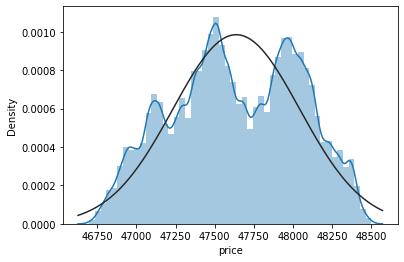

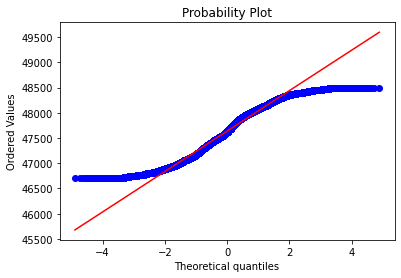

sharp ratio= ShapiroResult(statistic=0.36617863178253174, pvalue=0.0)
KS ratio= KstestResult(statistic=1.0, pvalue=0.0)


/Users/takeoyasukawa/Projects/bbanalyze/venv/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [40]:
compare_normal_dist(df['price'])

## 価格のlogを取った場合

/Users/takeoyasukawa/Projects/bbanalyze/venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


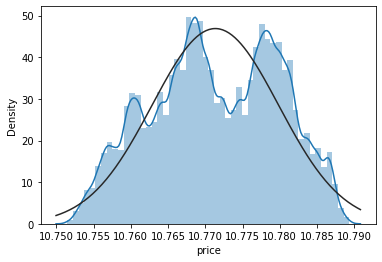

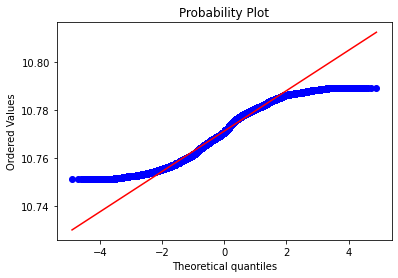

sharp ratio= ShapiroResult(statistic=0.006885111331939697, pvalue=0.0)
KS ratio= KstestResult(statistic=1.0, pvalue=0.0)


/Users/takeoyasukawa/Projects/bbanalyze/venv/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [41]:
compare_normal_dist(np.log(df['price']))


# 差分（リターン）の分布

/Users/takeoyasukawa/Projects/bbanalyze/venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


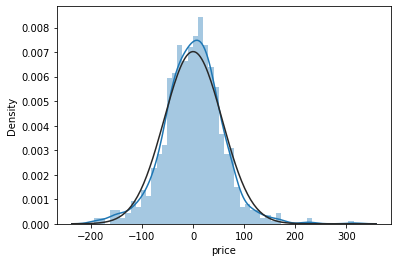

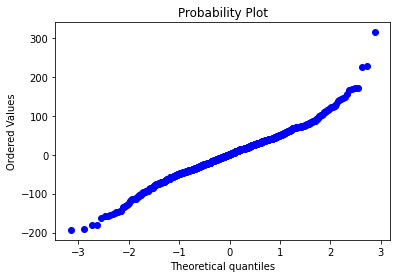

sharp ratio= ShapiroResult(statistic=nan, pvalue=1.0)
KS ratio= KstestResult(statistic=nan, pvalue=nan)


In [42]:
price = df['price']
diff = price.resample('5T').mean().diff()

compare_normal_dist(diff)


ウェイトをいれた利益率

/Users/takeoyasukawa/Projects/bbanalyze/venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


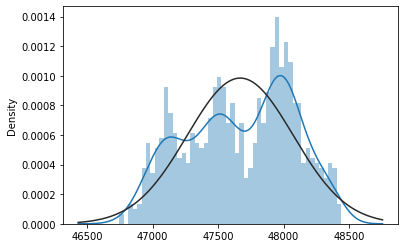

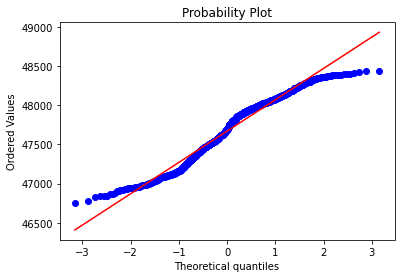

sharp ratio= ShapiroResult(statistic=0.9652337431907654, pvalue=1.7588674386306152e-13)
KS ratio= KstestResult(statistic=1.0, pvalue=0.0)


In [43]:
diff = df.resample('5T')
diff_s = diff.sum()

diff_h = diff_s['homeNotional']
diff_f = diff_s['foreignNotional']

dist = diff_h/diff_f

compare_normal_dist(dist)

/Users/takeoyasukawa/Projects/bbanalyze/venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


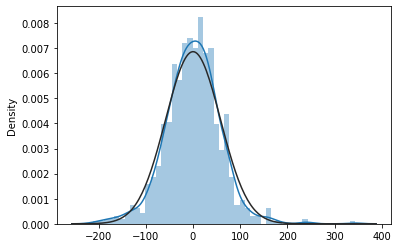

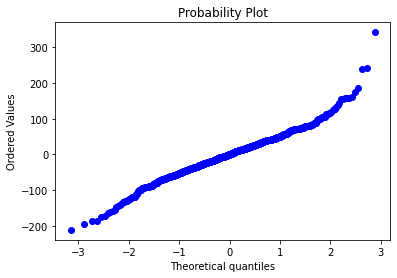

sharp ratio= ShapiroResult(statistic=nan, pvalue=1.0)
KS ratio= KstestResult(statistic=nan, pvalue=nan)


In [44]:
compare_normal_dist(dist.diff())


In [46]:
df['sumsize'] = df['size'].cumsum()



,symbol,side,size,price,tickDirection,trdMatchID,grossValue,homeNotional,foreignNotional,sumsize
timestamp,,,,,,,,,,
2021-09-15 23:59:58.640999936+00:00,BTCUSD,Buy,9894,48121.5,ZeroMinusTick,7436036c-9802-599c-bcd3-55e5d04e9ba5,20560456.0,9894,0.205605,9894
2021-09-15 23:59:58.640999936+00:00,BTCUSD,Buy,87822,48121.5,ZeroMinusTick,f98688fb-55a9-5be3-a0d3-d3be5d9b2468,182500545.0,87822,1.825005,97716
2021-09-15 23:59:58.640999936+00:00,BTCUSD,Buy,100580,48121.5,PlusTick,c4b8f17a-5429-54d5-a6f9-4361a8228ad4,209012603.0,100580,2.090126,198296
2021-09-15 23:59:58.024000+00:00,BTCUSD,Sell,3280,48121.0,MinusTick,8207cc1e-0ecb-5653-912e-954b0adb9089,6816150.0,3280,0.068161,201576
2021-09-15 23:59:54.726000128+00:00,BTCUSD,Buy,108,48121.5,PlusTick,16692672-507c-5732-a8a9-47e5b9f13fbe,224431.0,108,0.002244,201684
...,...,...,...,...,...,...,...,...,...,...
2021-09-17 00:00:01.358000128+00:00,BTCUSD,Buy,1,47779.0,PlusTick,8e7216de-f743-5144-a6d0-a7dbb5dc3d77,2092.0,1,0.000021,8683836700
2021-09-17 00:00:00.298000128+00:00,BTCUSD,Sell,9265,47778.5,ZeroMinusTick,58f5d815-100c-5992-9400-719759d47916,19391567.0,9265,0.193916,8683845965
2021-09-17 00:00:00.298000128+00:00,BTCUSD,Sell,3706,47778.5,ZeroMinusTick,1891d209-990f-5fe7-b571-12a15cb5840f,7756626.0,3706,0.077566,8683849671


In [432]:
def TrimData(exec_df, shift, width=pd.Timedelta('10m')):
    start_time = exec_df.index[-1] + shift
    end_time = start_time + width

    exec_df = exec_df[(start_time < exec_df.index) & (exec_df.index < end_time) ]
    print(start_time, end_time, len(exec_df))

    return exec_df


def DistPlot(exec_df, shift, width=pd.Timedelta('10m')):
    exec_df = TrimData(exec_df, shift, width)

    price = exec_df['price']
    diff = price.resample('1T').mean().diff()
    sns.distplot(diff, fit=t)



def ExecDistPlot(exec_df, shift, width=pd.Timedelta('10m')):
    exec_df = TrimData(exec_df, shift, width)

    price = exec_df['price']
    mean = price.resample('1T').mean()
    sns.distplot(mean, fit=t)

def StatExec(exec_df):
    group = exec_df.groupby(by=['price']).sum()
    print(group)
    return group


In [433]:
stat = StatExec(df).sum()

            size    grossValue  homeNotional  foreignNotional
price                                                        
44672.5    84664  1.895215e+08         84664         1.895215
44673.0    48031  1.075168e+08         48031         1.075168
44673.5  1037097  2.321504e+09       1037097        23.215038
44674.0   234656  5.252630e+08        234656         5.252630
44674.5   402298  9.005092e+08        402298         9.005092
...          ...           ...           ...              ...
47242.0        1  2.116000e+03             1         0.000021
47242.5     1532  3.242842e+06          1532         0.032428
47243.0   228377  4.834092e+08        228377         4.834092
47243.5   263143  5.569930e+08        263143         5.569930
47244.0   358622  7.590847e+08        358622         7.590847

[5123 rows x 4 columns]


In [434]:
sns.barplot(data=stat, x='price', y='size')

ValueError: Could not interpret input 'price'

In [ ]:
sns.countplot(stat)

In [ ]:
print(stat)

print(stat.sum())

In [ ]:
DistPlot(df, pd.Timedelta('10m'))

In [ ]:
DistPlot(df, pd.Timedelta('20m'))

In [ ]:
DistPlot(df, pd.Timedelta('60m'))

In [ ]:
ExecDistPlot(df, pd.Timedelta('120m'))

In [ ]:
ExecDistPlot(df, pd.Timedelta('10m'))

In [ ]:
ExecDistPlot(df, pd.Timedelta('20m'))

In [ ]:
ExecDistPlot(df, pd.Timedelta('60m'))

In [ ]:
ExecDistPlot(df, pd.Timedelta('120m'))





In [ ]:
start_time = df.index[-1]
start_time

In [ ]:
end_time = start_time + pd.Timedelta('30m')
df = df[df.index < end_time]
price = df['price']

diff = price.resample('2T').mean().diff()
sns.distplot(diff, fit=t)

In [ ]:
df

In [ ]:
start_time = start_time + pd.Timedelta('100m')
end_time = start_time + pd.Timedelta('30m')
df = df[(start_time <= df.index) & (df.index <= end_time)]

df



In [ ]:
diff = price.resample('2T').mean().diff()
sns.distplot(diff, fit=t)




In [ ]:
buy_df = df[df["side"] == "Buy"]
buy_df.describe()

In [ ]:
sell_df = df[df["side"] == "Sell"]
sell_df.describe()


In [ ]:
fig = plt.figure()

x1 = df.index
price = df['price']

plt.plot(x1, price, label="exec")

plt.show()


In [ ]:
edgedf = pd.read_csv("../DATA/BTCUSD2021-08-31.edge.csv.gz", index_col=0)

edgedf.index = pd.to_datetime(edgedf.index * 1_000)



edgedf

In [ ]:
edgedf.columns

In [ ]:
df.columns

In [ ]:
start_time = df.index[-1]
start_time

In [ ]:
end_time = start_time + pd.Timedelta('30m')
end_time

In [ ]:
df = df[df.index < end_time]
df

In [ ]:
edgedf = edgedf[edgedf.index < end_time]
edgedf

In [ ]:
x1 = df.index
price = df['price']

x2 = edgedf.index
buyprice = edgedf['buyprice']
sellprice = edgedf['sellprice']

buyedge = edgedf['buyedge']
selledge = edgedf['selledge']


In [ ]:
fig = plt.figure()

plt.plot(x1, price, label="exec")
plt.plot(x2, buyprice, label='buy price')
plt.plot(x2, sellprice, label='sell price')
plt.plot(x2, buyedge, label='buy edge')
plt.plot(x2, selledge, label='sell edge')

plt.show()



約定価格の決定ロジック

* 直近価格を取り出す
* taker  同一サイドの1tick先
* maker  反対サイドの2tick先

In [ ]:
exec_head = df.head(10)

exec_head







In [ ]:
first_rec = df[df["side"]=="Sell"].head(1)
sell_price = float(first_rec["price"])
sell_time = first_rec["timestamp"]



In [ ]:
first_rec = df[df["side"]=="Buy"].head(1)
buy_price = float(first_rec["price"])
buy_time = first_rec["timestamp"]

In [ ]:
print(sell_time, sell_price)
print(buy_time, buy_price)


* 売り板が薄い時はスリップする可能性がある。 <-正確な値は板情報がないと出ない。
* 逆行の勢いがある場合は約定しない。　←　約定データから計算できる。



In [ ]:
TICK = 0.5
taker_buy = buy_price + TICK * 2
maker_buy = sell_price + TICK * 2

maker_buy

In [ ]:
# check exec is done?

df[(df["price"]<=maker_buy) & (df["side"] == "Sell")]


## 正規性の検定
変動率が正規分布に従うかを検証する。

### 変動率の計算

In [ ]:
df.dtypes

In [ ]:

price = df['timestamp']
price.resample('1T')






In [ ]:
tick = df['price'].resample('T').mean()
tick



In [ ]:
fig = plt.figure()

x1 = df.index
price = df['price']

plt.plot(x1, price, label="exec")

plt.show()


In [ ]:

price_diff =df['price'].resample('1T').mean().diff()

price_diff

In [ ]:
fig = plt.figure()

x1 = df.index
price = price_diff['price']

plt.plot(x1, price, label="exec")

plt.show()


In [ ]:
price_diff.describe()

価格の分布

In [ ]:
data = np.array(df['price'])

fig = plt.figure()
plt.hist(data, bins=30)
plt.show()
#%

価格の*差分*分布

In [ ]:
diff_df = df.diff()

data = np.array(diff_df['price'])

fig = plt.figure()
plt.hist(data, bins=30)
plt.show()
#%
